In [1]:
%matplotlib widget

import pandas as pd
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import json
import os
from utils import *


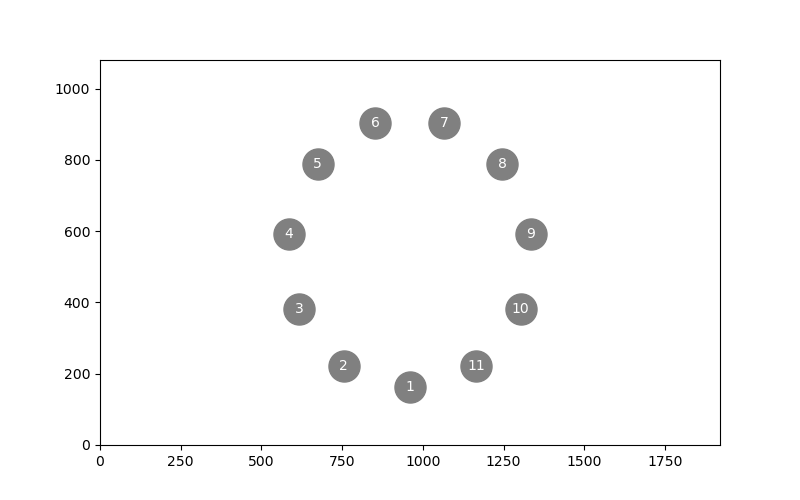

In [2]:
node_positions = [
    (960, 162),
    (755, 222),
    (616, 382),
    (585, 593),
    (674, 787),
    (853, 902),
    (1066, 902),
    (1245, 787),
    (1334, 593),
    (1303, 382),
    (1164, 222),
]
r = 60

# plot the nodes and add node number
plt.figure(figsize=(8, 5))

for i, (x, y) in enumerate(node_positions):
    plt.scatter(x, y, color='gray', s=500, label=f'node {i+1}')
    plt.text(x, y, str(i+1), ha='center', va='center', color='white', fontsize=10)

plt.xlim(0, 1920)
plt.ylim(0, 1080)
# plt.axis('equal')
plt.show()

In [3]:
csv_path = '/Users/lijialin/Desktop/Research/proj-two-stage-task/data/processed/eyetracking/'
json_path = '/Users/lijialin/Desktop/Research/proj-two-stage-task/data/processed/trial_data/'

eye_tracking_df = pd.read_csv(csv_path + 'P3.csv')

with open(os.path.join(json_path, 'P3.json'), 'r', encoding='utf-8') as f:
    behavior_obj = json.load(f)

eye_tracking_df.head()

,Type,Event,Visit,Switch,Time,TimeEvent,Offset,trial_index,Node,X,...,Pupil,Eye,Start_X,Start_Y,End_X,End_Y,Amplitude,Peak_Velocity,Start_Node,End_Node
0,Message,begin drift_check,0.0,0.0,4062.135000,351.602524,0.000000,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Message,initialize,0.0,0.0,4065.553000,355.019302,-0.001222,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Message,start recording,0.0,0.0,4065.553000,355.019646,-0.000878,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gaze,NaN,NaN,NaN,355.026524,NaN,NaN,1,8.0,995.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gaze,NaN,NaN,NaN,355.027524,NaN,NaN,1,8.0,994.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


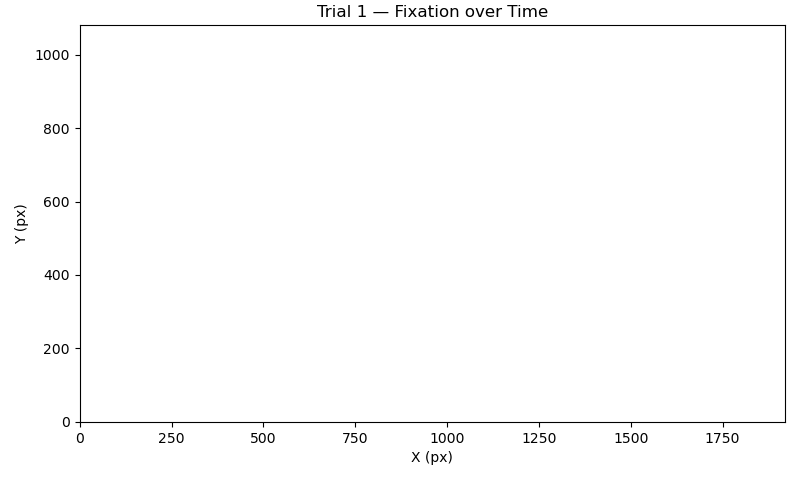

In [4]:
viewer = interactive_graph_gaze_viewer(
    eye_tracking_df,
    behavior_obj,
    default_node_positions=[
        (960,162),(755,222),(616,382),(585,593),(674,787),
        (853,902),(1066,902),(1245,787),(1334,593),(1303,382),(1164,222)
    ],
    AOI_r=100,
    screen_size=(1920,1080),
)